In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of Nodes: 1965206
Number of Edges: 2766607
Density of the Network: 1.4327206657979522e-06


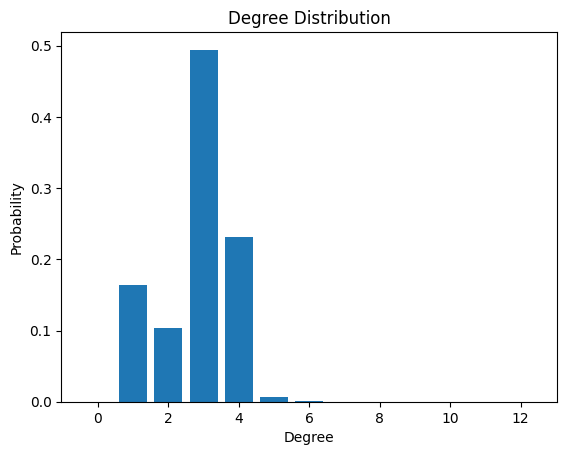

Top 10 Nodes by Degree Centrality:
[(562818, 6.106233191957073e-06), (534751, 5.088527659964228e-06), (521168, 5.088527659964228e-06), (1795416, 4.5796748939678044e-06), (5657, 4.070822127971382e-06), (5727, 4.070822127971382e-06), (6356, 4.070822127971382e-06), (290162, 4.070822127971382e-06), (291797, 4.070822127971382e-06), (309321, 4.070822127971382e-06)]


In [3]:

with open('/content/drive/MyDrive/Colab Notebooks/roadNet-CA.txt', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file.readlines()]

G = nx.Graph()
G.add_edges_from(edges)

print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())
print("Density of the Network:", nx.density(G))

degree_sequence = [d for n, d in G.degree()]
degree_counts = nx.degree_histogram(G)

degree_distribution = [count / len(G.nodes) for count in degree_counts]

plt.bar(range(len(degree_distribution)), degree_distribution)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution')
plt.show()
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 Nodes by Degree Centrality:")
print(sorted_centrality[:10])

communities = list(nx.community.greedy_modularity_communities(G))

In [ ]:
len(communities)

2949

In [ ]:
import networkx as nx


communities_greedy = list(nx.algorithms.community.greedy_modularity_communities(G))

community_sizes_greedy = [len(community) for community in communities_greedy]
print(f'Community sizes: {community_sizes_greedy}')

modularity_greedy = nx.algorithms.community.quality.modularity(G, communities_greedy)
print(f'Modularity: {modularity_greedy}')

Community sizes (Louvain-like): [21453, 12621, 11743, 10735, 10638, 10349, 10221, 10102, 10026, 9992, 9908, 9804, 9798, 9796, 9269, 9263, 9260, 8958, 8741, 8680, 8591, 8552, 8468, 8456, 8352, 8340, 8069, 8062, 8038, 8034, 8000, 7911, 7823, 7784, 7679, 7672, 7482, 7469, 7238, 7218, 7120, 7090, 7082, 6840, 6839, 6837, 6667, 6621, 6528, 6501, 6479, 6442, 6414, 6407, 6364, 6338, 6328, 6323, 6320, 6305, 6240, 6173, 6139, 6129, 6122, 6118, 6087, 6057, 6008, 5985, 5935, 5918, 5903, 5895, 5835, 5804, 5662, 5658, 5649, 5570, 5547, 5532, 5512, 5482, 5448, 5413, 5411, 5335, 5331, 5303, 5235, 5224, 5223, 5214, 5199, 5181, 5146, 5116, 5092, 5086, 5028, 5025, 5013, 4997, 4992, 4959, 4950, 4950, 4920, 4915, 4910, 4831, 4824, 4790, 4763, 4699, 4667, 4618, 4608, 4595, 4578, 4567, 4514, 4491, 4463, 4433, 4419, 4351, 4335, 4309, 4298, 4293, 4291, 4283, 4281, 4277, 4275, 4258, 4243, 4224, 4220, 4181, 4149, 4103, 4067, 4049, 4037, 4036, 4007, 3917, 3912, 3882, 3882, 3872, 3849, 3845, 3844, 3790, 3696, 3679

In [ ]:
import networkx as nx
from networkx.algorithms.community.quality import modularity


communities_greedy = [list(community) for community in communities_greedy]

modularity_list = []
for i, community in enumerate(communities_greedy):
    intra_edges = G.subgraph(community).number_of_edges()
    total_edges = G.subgraph(community).size()
    fraction_intra_edges = intra_edges / total_edges if total_edges > 0 else 0.0
    total_graph_edges = G.size()
    fraction_total_edges = total_edges / total_graph_edges if total_graph_edges > 0 else 0.0
    modularity_community = fraction_intra_edges - (fraction_total_edges ** 2)

    modularity_list.append((i + 1, community, modularity_community))

modularity_list.sort(key=lambda x: x[2], reverse=True)

for rank, community, modularity_value in modularity_list[:10]:
    print(f'Rank {rank}: Community {community} with Modularity {modularity_value}')

Rank 554: Community [320, 319] with Modularity 0.9999999999996426
Rank 555: Community [23186, 41725] with Modularity 0.9999999999996426
Rank 556: Community [36972, 36973] with Modularity 0.9999999999996426
Rank 557: Community [42579, 42580] with Modularity 0.9999999999996426
Rank 558: Community [44357, 44358] with Modularity 0.9999999999996426
Rank 559: Community [44361, 44362] with Modularity 0.9999999999996426
Rank 560: Community [44491, 44492] with Modularity 0.9999999999996426
Rank 561: Community [45164, 45165] with Modularity 0.9999999999996426
Rank 562: Community [46908, 46909] with Modularity 0.9999999999996426
Rank 563: Community [48560, 48561] with Modularity 0.9999999999996426


In [ ]:
for rank, community, modularity_value in modularity_list[:10]:
    print(f'Rank {rank}: Community {community} with Modularity {modularity_value}')

In [ ]:
min_modularity = min(mod[2] for mod in modularity_list)
max_modularity = max(mod[2] for mod in modularity_list)

print(f'Minimum Modularity: {min_modularity}')
print(f'Maximum Modularity: {max_modularity}')

Minimum Modularity: 0.9995499591383672
Maximum Modularity: 0.9999999999996426


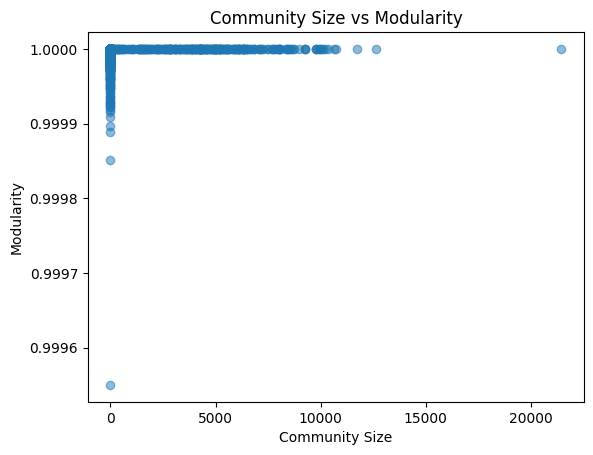

In [ ]:
community_sizes = [len(community) for community in communities_greedy]
mod = [mod[2] for mod in modularity_list]
print()
#print(community_sizes[:3])

plt.scatter(community_sizes, mod, marker='o', alpha=0.5)
plt.xlabel('Community Size')
plt.ylabel('Modularity')
plt.title('Community Size vs Modularity')
plt.show()

In [ ]:
print(len(community_sizes))
print(len(modularity_list))

1714
1714
